In [9]:
%cd /qbio/nest/alpaca/Tutorial

import numpy as np
import matplotlib.pyplot as plt
import math


#For each gene, extract data of its longest transcript
#This function returns a dictionary. key: gene name(GENCODE) value: [start position, end position, length of transcript, direction(+/-)]
def makeTrxdata(gtf):
    with open(gtf) as inpfile:
        gt_dict={}
        for line in inpfile:
            if line.startswith('#'):
                continue
            feature=line.strip('\n').split('\t')
            strand=feature[6]
            #print(strand)
            
            
            
            feature=line.strip('\n').split('\t')
            contig=feature[0]
            feature_type=feature[2]
            start=int(feature[3])
            end=int(feature[4])
            
            strand=feature[6]

            attribute_dict={}
            
            for attribute in feature[-1].split(';')[:-1]:
                atr=attribute.strip(' ').split(' ')
                attribute_dict[atr[0]]=atr[1].strip('"')
                
            #print(contig, feature_type, start,end,strand)
            #print(attribute_dict)
            #break
            if attribute_dict['gene_type'] !='protein_coding':
                continue
            else:
                gene_id=attribute_dict['gene_id'].strip()
                if feature_type=='gene':
                    gt_dict[gene_id]={}
                elif feature_type=='transcript':
                    t_id=attribute_dict['transcript_id']
                    gt_dict[gene_id][t_id]=[start, end, abs(start-end)+1, strand]
        return(gt_dict)
                    #print(gt_dict)
            #        break
            
            #    if attribute_dict['gene_type']=='protein_coding':                


#Similarly, extract data of each gene.

def get_longest_isoform(gt_dict):
    g_lt_dict={}
    for g, ts in gt_dict.items():
        argmax=np.argmax(np.array(ts.values()))
        
        #print(list(ts.keys())[argmax])
        #break
        
#        break
        g_lt_dict[g]=list(ts.keys())[argmax]
        #break
    return(g_lt_dict)


/qbio/nest/alpaca/Tutorial


In [10]:
#Run the functions defined above, and assign their results

#Gene = makeGenedata('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf')
Trxdata = makeTrxdata('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf')
longest_isoform=get_longest_isoform(Trxdata)
#print(Trxdata)
#print(longest_isoform)

In [28]:
#This function returns the data about exons and CDSs for each transcript.

def makeExonData(addr, Trxdata):
    result={}
    count=0
    with open(addr) as file_data:
        for line in file_data:
            exonlength=0
            status=0
            if line.startswith('#'):
                continue
            else:
                tmp1 = line.split('\t')
                if 'protein_coding' in tmp1[8] and 'exon' in tmp1[2]:
                    tmp2 = tmp1[8].split(';')
                    #tmp1: ['chr1', 'HAVANA', 'exon', '3213609', '3216344', '.', '-', '.', 'gene_id "ENSMUSG00000051951.5"; transcript_id "ENSMUST00000162897.1"; gene_type "protein_coding"; gene_name "Xkr4"; transcript_type "processed_transcript"; transcript_name "Xkr4-203"; exon_number 1; exon_id "ENSMUSE00000858910.1"; level 2; transcript_support_level "1"; mgi_id "MGI:3528744"; havana_gene "OTTMUSG00000026353.2"; havana_transcript "OTTMUST00000086625.1";\n']
                    #tmp2: ['gene_id "ENSMUSG00000051951.5"', ' transcript_id "ENSMUST00000162897.1"', ' gene_type "protein_coding"', ' gene_name "Xkr4"', ' transcript_type "processed_transcript"', ' transcript_name "Xkr4-203"', ' exon_number 1', ' exon_id "ENSMUSE00000858910.1"', ' level 2', ' transcript_support_level "1"', ' mgi_id "MGI:3528744"', ' havana_gene "OTTMUSG00000026353.2"', ' havana_transcript "OTTMUST00000086625.1"', '\n']
                    trx_id = tmp2[1][16:-1]
                    gene_id = tmp2[0][9:-1]
                    exon_id = tmp2[7][10:-1]
        
                    if trx_id in longest_isoform.values():
                        left=int(tmp1[3])
                        right=int(tmp1[4])
                        position = [left, right, abs(left-right)+1, tmp1[6]]
                        
                        if gene_id not in result:
                            result[gene_id] = {}
                            result[gene_id][exon_id] = position                             
                        else:
                            result[gene_id][exon_id] = position
                        count+=1
                    else:
                        continue
            #if count>70:
             #    break
    
    return result


def makeCDSData(addr, Trxdata):
    result={}
    count=0
    with open(addr) as file_data:
        for line in file_data:
            exonlength=0
            status=0
            if line.startswith('#'):
                continue
            else:
                tmp1 = line.split('\t')
                if 'protein_coding' in tmp1[8] and 'CDS' in tmp1[2]:
                    tmp2 = tmp1[8].split(';')
                    #tmp1: ['chr1', 'HAVANA', 'exon', '3213609', '3216344', '.', '-', '.', 'gene_id "ENSMUSG00000051951.5"; transcript_id "ENSMUST00000162897.1"; gene_type "protein_coding"; gene_name "Xkr4"; transcript_type "processed_transcript"; transcript_name "Xkr4-203"; exon_number 1; exon_id "ENSMUSE00000858910.1"; level 2; transcript_support_level "1"; mgi_id "MGI:3528744"; havana_gene "OTTMUSG00000026353.2"; havana_transcript "OTTMUST00000086625.1";\n']
                    #tmp2: ['gene_id "ENSMUSG00000051951.5"', ' transcript_id "ENSMUST00000162897.1"', ' gene_type "protein_coding"', ' gene_name "Xkr4"', ' transcript_type "processed_transcript"', ' transcript_name "Xkr4-203"', ' exon_number 1', ' exon_id "ENSMUSE00000858910.1"', ' level 2', ' transcript_support_level "1"', ' mgi_id "MGI:3528744"', ' havana_gene "OTTMUSG00000026353.2"', ' havana_transcript "OTTMUST00000086625.1"', '\n']
                    trx_id = tmp2[1][16:-1]
                    gene_id = tmp2[0][9:-1]
                    exon_id = tmp2[7][10:-1]
        
                    if trx_id in longest_isoform.values():
                        left=int(tmp1[3])
                        right=int(tmp1[4])
                        position = [left, right, abs(left-right)+1, tmp1[6]]
                        
                        if gene_id not in result:
                            result[gene_id] = {}
                            result[gene_id][exon_id] = position                             
                        else:
                            result[gene_id][exon_id] = position
                        count+=1
                    else:
                        continue
            #if count>70:
             #    break
    
    return result

Exondata = makeExonData('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf', Trxdata)
print(len(Exondata))
CDSdata = makeCDSData('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf', Trxdata)
print(len(CDSdata))
#print(Length)



21936
19974


In [20]:
#Siamilarly, extract data of starting/stop codon of each transcript.

def makeStartData(addr, Trxdata):
    result={}
    count=0
    with open(addr) as file_data:
        for line in file_data:
            exonlength=0
            status=0
            if line.startswith('#'):
                continue
            else:
                tmp1 = line.split('\t')
                if 'protein_coding' in tmp1[8] and 'start_codon' in tmp1[2]:
                    tmp2 = tmp1[8].split(';')
                    #tmp1: ['chr1', 'HAVANA', 'exon', '3213609', '3216344', '.', '-', '.', 'gene_id "ENSMUSG00000051951.5"; transcript_id "ENSMUST00000162897.1"; gene_type "protein_coding"; gene_name "Xkr4"; transcript_type "processed_transcript"; transcript_name "Xkr4-203"; exon_number 1; exon_id "ENSMUSE00000858910.1"; level 2; transcript_support_level "1"; mgi_id "MGI:3528744"; havana_gene "OTTMUSG00000026353.2"; havana_transcript "OTTMUST00000086625.1";\n']
                    #tmp2: ['gene_id "ENSMUSG00000051951.5"', ' transcript_id "ENSMUST00000162897.1"', ' gene_type "protein_coding"', ' gene_name "Xkr4"', ' transcript_type "processed_transcript"', ' transcript_name "Xkr4-203"', ' exon_number 1', ' exon_id "ENSMUSE00000858910.1"', ' level 2', ' transcript_support_level "1"', ' mgi_id "MGI:3528744"', ' havana_gene "OTTMUSG00000026353.2"', ' havana_transcript "OTTMUST00000086625.1"', '\n']
                    trx_id = tmp2[1][16:-1]
                    gene_id = tmp2[0][9:-1]
                    exon_id = tmp2[7][10:-1]
        
                    if trx_id in longest_isoform.values():
                        left=int(tmp1[3])
                        right=int(tmp1[4])
                        position = [left, right, abs(left-right)+1, tmp1[6]]
                        
                        if gene_id not in result:
                            result[gene_id] = {}
                            result[gene_id][trx_id] = position                             
                        else:
                            result[gene_id][trx_id] = position
                        count+=1
                    else:
                        continue
            #if count>70:
             #    break
    
    return result


def makeStopData(addr, Trxdata):
    result={}
    count=0
    with open(addr) as file_data:
        for line in file_data:
            exonlength=0
            status=0
            if line.startswith('#'):
                continue
            else:
                tmp1 = line.split('\t')
                if 'protein_coding' in tmp1[8] and 'stop_codon' in tmp1[2]:
                    tmp2 = tmp1[8].split(';')
                    #tmp1: ['chr1', 'HAVANA', 'exon', '3213609', '3216344', '.', '-', '.', 'gene_id "ENSMUSG00000051951.5"; transcript_id "ENSMUST00000162897.1"; gene_type "protein_coding"; gene_name "Xkr4"; transcript_type "processed_transcript"; transcript_name "Xkr4-203"; exon_number 1; exon_id "ENSMUSE00000858910.1"; level 2; transcript_support_level "1"; mgi_id "MGI:3528744"; havana_gene "OTTMUSG00000026353.2"; havana_transcript "OTTMUST00000086625.1";\n']
                    #tmp2: ['gene_id "ENSMUSG00000051951.5"', ' transcript_id "ENSMUST00000162897.1"', ' gene_type "protein_coding"', ' gene_name "Xkr4"', ' transcript_type "processed_transcript"', ' transcript_name "Xkr4-203"', ' exon_number 1', ' exon_id "ENSMUSE00000858910.1"', ' level 2', ' transcript_support_level "1"', ' mgi_id "MGI:3528744"', ' havana_gene "OTTMUSG00000026353.2"', ' havana_transcript "OTTMUST00000086625.1"', '\n']
                    trx_id = tmp2[1][16:-1]
                    gene_id = tmp2[0][9:-1]
                    exon_id = tmp2[7][10:-1]
        
                    if trx_id in longest_isoform.values():
                        left=int(tmp1[3])
                        right=int(tmp1[4])
                        position = [left, right, abs(left-right)+1, tmp1[6]]
                        
                        if gene_id not in result:
                            result[gene_id] = {}
                            result[gene_id][trx_id] = position                             
                        else:
                            result[gene_id][trx_id] = position
                        count+=1
                    else:
                        continue
            #if count>70:
             #    break
    
    return result 

Startdata=makeStartData('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf', Trxdata)
Stopdata=makeStopData('./GenomeIndex/gencode.vM25.primary_assembly.annotation.gtf', Trxdata)

In [22]:
#This function returns a dictionary contains position data of sequencing result

def makedata(addr, Trxdata, longest_isoform):
    count=0
    result = {}
    
    with open(addr) as file_data:

        for line in file_data:
            if line.startswith('@'):
                continue
            else:
                tmp1 = line.split('\t')
                if int(tmp1[1]) == 4 or int(tmp1[1]) == 16 or int(tmp1[1]) == 32:
                    continue
                else:
                    tmp2 = tmp1[2].split('|')
                    #tmp2: ['ENSMUST00000198477.2', 'ENSMUSG00000106106.3', 'OTTMUSG00000053277.2', 'OTTMUST00000133068.2', 'CT010467.1-201', 'CT010467.1', '1849', 'rRNA', '']
                    mapped_position = int(tmp1[3])
                    if 'protein_coding' in tmp1[2]:
                        if tmp2[0] in longest_isoform.values():
                            count+=1
                            if tmp2[1] in result:
                                result[tmp2[1]].append(mapped_position)
                            else:
                                result[tmp2[1]]=[mapped_position]
                        else:
                            continue
                    
    return result

In [23]:
#Run makedata function defined above

pos_siLin = makedata('./Align_RiboProf-siLin28a/Aligned.out.sam', Trxdata, longest_isoform)
print(len(pos_siLin))

13820


In [24]:
pos_siLuc = makedata('./Align_RiboProf-siLuc/Aligned.out.sam', Trxdata, longest_isoform)
print(len(pos_siLuc))

13939


In [192]:
#This function calculates Relative position to start codon of 5'-end of reads, thus, x-coordinate of figure S5A, with single gene.
#The output format is a 3D list. each element is a list with 4 elements, which are lists of relative positions.

def getExon(Exons, value):
    for exon in Exons:
        if value > Exons[exon][0] and value < Exons[exon][1]:
            return exon
    else:
        return {}

#print(getExon(Exondata['ENSMUSG00000033845.13'], 4785575))
        
def sampledata(sample, Trxdata, longest_isoform, Exondata, CDSData, StartData, StopData, pos_siLin, pos_siLuc):
    resdata=[]
    for i in sample:
        
        Trx_name = longest_isoform[i]

        Transcript = Trxdata[i][longest_isoform[i]]
        #Transcript: [3205901, 3216344, 10443, '-']
        Exon = Exondata[i]
        CDS = CDSdata[i]
        #Exon/CDS: {'ENSMUSE00000450421.7': [4785573, 4785710, 138, '-'], 'ENSMUSE00001229301.1': [4783951, 4784105, 155, '-'], 'ENSMUSE00001268906.1': [4782568, 4782733, 166, '-'], 'ENSMUSE00001298601.1': [4777525, 4777648, 124, '-'], 'ENSMUSE00000771965.1': [4773206, 4774516, 1311, '-']}
        
        Exonlength = 0
        for exon in Exon:
            Exonlength += Exon[exon][2]
            
        #print(Exonlength)

        
        Start = StartData[i]
        Stop = StopData[i]
        siLin_position = pos_siLin[i]
        siLuc_position = pos_siLuc[i]
        
        #exonlength = 0
        #for exon in Exon:
        #    exonlength += Exon[exon][2]
        
        Linpos_start = []
        Linpos_stop = []
        Lucpos_start = []
        Lucpos_stop = []
        
        start_position = Start[Trx_name][0]
        stop_position = Stop[Trx_name][0] 
        start_exon = getExon(Exon, start_position)
        stop_exon = getExon(Exon, stop_position)
        
        if len(start_exon) == 0 or len(stop_exon)==0:
            continue
        
        if i in CDSdata:
        
            if Transcript[3] == '+':
            
                UTR5 = CDS[start_exon][0] - Exon[start_exon][0]
                UTR3 = Exon[stop_exon][1] - CDS[stop_exon][1]
                
                for pos in siLin_position:
                    distance_from_start = pos - UTR5
                    Linpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Linpos_stop.append(distance_from_stop)
                        
                for pos in siLuc_position:
                    distance_from_start = pos - UTR5
                    Lucpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Lucpos_stop.append(distance_from_stop)                    
           
            else:
                
                UTR5 = Exon[start_exon][1] - CDS[start_exon][1]
                UTR3 = CDS[stop_exon][0] - Exon[stop_exon][0]
                
                for pos in siLin_position:
                    distance_from_start = pos - UTR5
                    Linpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Linpos_stop.append(distance_from_stop)
                        
                for pos in siLuc_position:
                    distance_from_start = pos - UTR5
                    Lucpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Lucpos_stop.append(distance_from_stop)
            
            Linpos_start.sort()
            Linpos_stop.sort()
            Lucpos_start.sort()
            Lucpos_stop.sort()
            
            resdata.append([Linpos_start, Linpos_stop, Lucpos_start, Lucpos_stop])

    return resdata

sample = ['ENSMUSG00000033845.13', 'ENSMUSG00000026980.15', 'ENSMUSG00000037169.15', 'ENSMUSG00000060377.4', 'ENSMUSG00000079435.9']
resdata = sampledata(sample, Trxdata, longest_isoform, Exondata, CDSdata, Startdata, Stopdata, pos_siLin, pos_siLuc)
#for i in range(4):
    #print(test[0][i])
#    print()



[]


IndexError: list index out of range

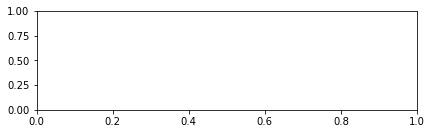

In [194]:
#Draw Fig S5A with single gene data.
#sample provides some protein-coding genes that ribosome footprinting result data are aligned to.
#By setting the value of index(0~19), we can see the graph for each gene, for test.
index=0
#sample=['ENSMUSG00000020717.19', 'ENSMUSG00000026980.15', 'ENSMUSG00000078812.10', 'ENSMUSG00000037169.15', 'ENSMUSG00000060377.4', 
#        'ENSMUSG00000079435.9', 'ENSMUSG00000046591.10', 'ENSMUSG00000038412.8', 'ENSMUSG00000070047.14', 'ENSMUSG00000079445.3', 
#        'ENSMUSG00000001552.14', 'ENSMUSG00000021025.8', 'ENSMUSG00000028792.14', 'ENSMUSG00000027248.13', 'ENSMUSG00000025351.14', 
#        'ENSMUSG00000030062.7', 'ENSMUSG00000063316.13', 'ENSMUSG00000060461.5', 'ENSMUSG00000041959.14', 'ENSMUSG00000025967.16']
#resdata=sampledata(sample, Trxdata, longest_isoform, Exondata, CDSdata, Startdata, Stopdata, pos_siLin, pos_siLuc)

plt.rcParams["figure.figsize"] = (15,4)

plt.subplot(221)
plt.hist(resdata[index][2], bins=range(-50,50))
plt.ylabel(sample[index]+'\nsiLuc\nRaw read count\n')
plt.grid()

plt.subplot(222)
plt.hist(resdata[index][3], bins=range(-50,20))
plt.ylabel('siLin28a\nRaw read count')
plt.grid()

plt.subplot(223)
plt.hist(resdata[index][0], bins=range(-50,50))
plt.ylabel('siLin28a\nRaw read count')
plt.grid()

plt.subplot(224)
plt.hist(resdata[index][1], bins=range(-50,20))
plt.ylabel('siLin28a\nRaw read count')
plt.grid()


#gap1 120
#gap2 17343
#print(Trx['ENSMUSG00000028792.14'])
#print(Start['ENSMUSG00000028792.14'])
#print(Stop['ENSMUSG00000028792.14'])
#print(Lin['ENSMUSG00000028792.14'])
#plt.savefig('Figure S5A_singlegene2.png', dpi=500)
plt.show()


In [197]:
#This function calculates Relative position to start codon of 5'-end of reads, thus, x-coordinate of figure S5A with whole gene data.
#The output format is a 3D list. each element is a list with 4 elements, which are lists of relative positions.

def getExon(Exons, value):
    for exon in Exons:
        if value > Exons[exon][0] and value < Exons[exon][1]:
            return exon
    else:
        return {}

#print(getExon(Exondata['ENSMUSG00000033845.13'], 4785575))
        
def wholedata(sample, Trxdata, longest_isoform, Exondata, CDSData, StartData, StopData, pos_siLin, pos_siLuc):

    Linpos_start = []
    Linpos_stop = []
    Lucpos_start = []
    Lucpos_stop = []

    for i in sample:
        if i in Trxdata and i in longest_isoform and i in Exondata and i in CDSData and i in StartData and i in StopData and i in pos_siLin and i in pos_siLuc:
            
            Trx_name = longest_isoform[i]
    
            Transcript = Trxdata[i][longest_isoform[i]]
            #Transcript: [3205901, 3216344, 10443, '-']
            Exon = Exondata[i]
            CDS = CDSdata[i]
            #Exon/CDS: {'ENSMUSE00000450421.7': [4785573, 4785710, 138, '-'], 'ENSMUSE00001229301.1': [4783951, 4784105, 155, '-'], 'ENSMUSE00001268906.1': [4782568, 4782733, 166, '-'], 'ENSMUSE00001298601.1': [4777525, 4777648, 124, '-'], 'ENSMUSE00000771965.1': [4773206, 4774516, 1311, '-']}
            
            Exonlength = 0
            for exon in Exon:
                Exonlength += Exon[exon][2]
                
            #print(Exonlength)
    
            
            Start = StartData[i]
            Stop = StopData[i]
            siLin_position = pos_siLin[i]
            siLuc_position = pos_siLuc[i]
            
            #exonlength = 0
            #for exon in Exon:
            #    exonlength += Exon[exon][2]
            
            start_position = Start[Trx_name][0]
            stop_position = Stop[Trx_name][0] 
            start_exon = getExon(Exon, start_position)
            stop_exon = getExon(Exon, stop_position)
            
            if len(start_exon) == 0 or len(stop_exon)==0 or start_exon not in CDS or start_exon not in Exon or stop_exon not in CDS or stop_exon not in CDS:
                continue
        
            
            if Transcript[3] == '+':  
                
                UTR5 = CDS[start_exon][0] - Exon[start_exon][0]
                UTR3 = Exon[stop_exon][1] - CDS[stop_exon][1] 
                
                for pos in siLin_position:
                    distance_from_start = pos - UTR5
                    Linpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Linpos_stop.append(distance_from_stop)
                            
                for pos in siLuc_position:
                    distance_from_start = pos - UTR5
                    Lucpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Lucpos_stop.append(distance_from_stop)                    
               
            else:
                
                UTR5 = Exon[start_exon][1] - CDS[start_exon][1]
                UTR3 = CDS[stop_exon][0] - Exon[stop_exon][0]  
                
                for pos in siLin_position:
                    distance_from_start = pos - UTR5
                    Linpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Linpos_stop.append(distance_from_stop)
                            
                for pos in siLuc_position:
                    distance_from_start = pos - UTR5
                    Lucpos_start.append(distance_from_start)
                    distance_from_stop = UTR3 - (Exonlength - pos)
                    Lucpos_stop.append(distance_from_stop)
                
            #Linpos_start.sort()
            #Linpos_stop.sort()
            #Lucpos_start.sort()
            #Lucpos_stop.sort()
            
            

    return [Linpos_start, Linpos_stop, Lucpos_start, Lucpos_stop]

sample = ['ENSMUSG00000033845.13', 'ENSMUSG00000026980.15', 'ENSMUSG00000037169.15', 'ENSMUSG00000060377.4', 'ENSMUSG00000079435.9']
resdata = sampledata(sample, Trxdata, longest_isoform, Exondata, CDSdata, Startdata, Stopdata, pos_siLin, pos_siLuc)
#for i in range(4):
    #print(test[0][i])
#    print()

['ENSMUSG00000061518.11', 'ENSMUSG00000079941.1', 'ENSMUSG00000059070.16', 'ENSMUSG00000004748.5', 'ENSMUSG00000037470.14', 'ENSMUSG00000023944.14', 'ENSMUSG00000025534.17', 'ENSMUSG00000021670.14', 'ENSMUSG00000047881.14', 'ENSMUSG00000022982.10', 'ENSMUSG00000025008.15', 'ENSMUSG00000056201.8', 'ENSMUSG00000003429.11', 'ENSMUSG00000039682.12', 'ENSMUSG00000021144.14']
<class 'dict'>


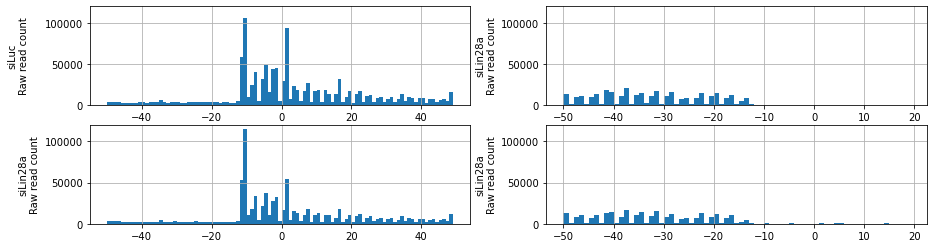

In [204]:
#Draw Fig S5A with whole gene data

Totdata = list(pos_siLin.keys())
print(Totdata[15:30])
print(type(pos_siLin))
Totresdata = wholedata(Totdata, Trxdata, longest_isoform, Exondata, CDSdata, Startdata, Stopdata, pos_siLin, pos_siLuc)

factor = 1000

plt.rcParams["figure.figsize"] = (15,4)

plt.subplot(221)
plt.hist(Totresdata[2], bins=range(-50,50))
plt.ylim(0,120000)
plt.ylabel('siLuc\nRaw read count\n')
plt.grid()

plt.subplot(222)
plt.hist(Totresdata[3], bins=range(-50,20))
plt.ylim(0,120000)
plt.ylabel('siLin28a\nRaw read count')
plt.grid()

plt.subplot(223)
plt.hist(Totresdata[0], bins=range(-50,50))
plt.ylim(0,120000)
plt.ylabel('siLin28a\nRaw read count')
plt.grid()

plt.subplot(224)
plt.hist(Totresdata[1], bins=range(-50,20))
plt.ylim(0,120000)
plt.ylabel('siLin28a\nRaw read count')
plt.grid()


#gap1 120
#gap2 17343
#print(Trx['ENSMUSG00000028792.14'])
#print(Start['ENSMUSG00000028792.14'])
#print(Stop['ENSMUSG00000028792.14'])
#print(Lin['ENSMUSG00000028792.14'])
plt.savefig('Figure S5A_wholegene.png', dpi=500)
plt.show()

In [115]:
#Finding sample genes to check the code above. The result of this code is copy-and-pasted to a list named Sample

counter=0
sample=[]
for gene in pos_siLin:
    if counter==0:
        counter+=1
        continue
    else:
        sample.append(gene)
        counter+=1
        if counter>20:
            break
print(sample)

['ENSMUSG00000026980.15', 'ENSMUSG00000037169.15', 'ENSMUSG00000060377.4', 'ENSMUSG00000079435.9', 'ENSMUSG00000046591.10', 'ENSMUSG00000038412.8', 'ENSMUSG00000070047.14', 'ENSMUSG00000021025.8', 'ENSMUSG00000027248.13', 'ENSMUSG00000030062.7', 'ENSMUSG00000063316.13', 'ENSMUSG00000060461.5', 'ENSMUSG00000041959.14', 'ENSMUSG00000025967.16', 'ENSMUSG00000061518.11', 'ENSMUSG00000079941.1', 'ENSMUSG00000059070.16', 'ENSMUSG00000004748.5', 'ENSMUSG00000037470.14', 'ENSMUSG00000023944.14']


In [189]:
#Scratch for debugging

i = 'ENSMUSG00000079941.1'

Start = Startdata[i]
Stop = Stopdata[i]
siLin_position = pos_siLin[i]
siLuc_position = pos_siLuc[i]

Exon=Exondata[i]
CDS=CDSdata[i]
Trx_name = longest_isoform[i]
start_position = Start[Trx_name][0]
stop_position = Stop[Trx_name][0] 
start_exon = getExon(Exon, start_position)
stop_exon = getExon(Exon, stop_position)

#UTR5 = CDS[start_exon][0] - Exon[start_exon][0]
print(stop_exon)

#UTR3 = Exon[stop_exon][1]- CDS[stop_exon][1]


print(Start)
print()
print(Stop)
print()
#print(siLin_position)
print()
#print(siLuc_position)

i = 'ENSMUSG00000026980.15'

Start = Startdata[i]
Stop = Stopdata[i]
siLin_position = pos_siLin[i]
siLuc_position = pos_siLuc[i]

Exon=Exondata[i]
CDS=CDSdata[i]
Trx_name = longest_isoform[i]
start_position = Start[Trx_name][0]
stop_position = Stop[Trx_name][0] 
start_exon = getExon(Exon, start_position)
stop_exon = getExon(Exon, stop_position)

print(Exon)
print(Start)
print()
print(Stop)
print()
#print(siLin_position)
print()
#print(siLuc_position)


{}
{'ENSMUST00000044043.2': [21501416, 21501418, 3, '-']}

{'ENSMUST00000044043.2': [21501029, 21501031, 3, '-']}


{'ENSMUSE00000645009.2': [60383138, 60383303, 166, '-'], 'ENSMUSE00000342189.2': [60375858, 60376229, 372, '-'], 'ENSMUSE00000250226.1': [60368759, 60368929, 171, '-'], 'ENSMUSE00000250220.1': [60365011, 60365175, 165, '-'], 'ENSMUSE00000250212.1': [60358468, 60358578, 111, '-'], 'ENSMUSE00000250204.1': [60357277, 60357417, 141, '-'], 'ENSMUSE00000250194.2': [60355369, 60355560, 192, '-'], 'ENSMUSE00000165085.1': [60354405, 60354562, 158, '-'], 'ENSMUSE00000165117.1': [60352922, 60353032, 111, '-'], 'ENSMUSE00000165093.1': [60352354, 60352442, 89, '-'], 'ENSMUSE00000165115.1': [60352056, 60352225, 170, '-'], 'ENSMUSE00000165091.1': [60349858, 60350057, 200, '-'], 'ENSMUSE00000165084.1': [60348353, 60348495, 143, '-'], 'ENSMUSE00000165071.1': [60340153, 60340234, 82, '-'], 'ENSMUSE00000165095.1': [60338295, 60338363, 69, '-'], 'ENSMUSE00000165110.1': [60334446, 60334564, 1

In [32]:
#Scratch for checking the code

print('Trxdata')
count=0
for i in Trxdata:
    count+=1
    print(Trxdata[i])
    if count>=3:
        break

print()
print('longest_isoform')
    
count=0
for i in longest_isoform:
    count+=1
    print(longest_isoform[i])
    if count>=3:
        break
        
print() 
print('Exondata')

count=0
for i in Exondata:
    count+=1
    print(Exondata[i])
    if count>=3:
        break

print()
print('CDSdata')
        
count=0
for i in CDSdata:
    count+=1
    print(i)
    print(CDSdata[i])
    if count>=3:
        break

print()
print('Startdata')

count=0
for i in Startdata:
    count+=1
    print(Startdata[i])
    if count>=3:
        break

print()
print('Stopdata')

count=0
for i in Stopdata:
    count+=1
    print(Stopdata[i])
    if count>=3:
        break

Trxdata
{'ENSMUST00000162897.1': [3205901, 3216344, 10444, '-'], 'ENSMUST00000159265.1': [3206523, 3215632, 9110, '-'], 'ENSMUST00000070533.4': [3214482, 3671498, 457017, '-']}
{'ENSMUST00000208660.1': [3999557, 4409241, 409685, '-'], 'ENSMUST00000208793.1': [4290846, 4409241, 118396, '-'], 'ENSMUST00000027032.5': [4344146, 4360314, 16169, '-']}
{'ENSMUST00000027035.9': [4490931, 4496413, 5483, '-'], 'ENSMUST00000195555.1': [4491250, 4496757, 5508, '-'], 'ENSMUST00000192650.5': [4491390, 4497354, 5965, '-'], 'ENSMUST00000116652.7': [4491713, 4496363, 4651, '-'], 'ENSMUST00000192505.1': [4492457, 4493604, 1148, '-'], 'ENSMUST00000191647.1': [4492458, 4496330, 3873, '-'], 'ENSMUST00000191939.1': [4492465, 4493735, 1271, '-'], 'ENSMUST00000192913.1': [4492467, 4496396, 3930, '-']}

longest_isoform
ENSMUST00000162897.1
ENSMUST00000208660.1
ENSMUST00000027035.9

Exondata
{'ENSMUSE00000858910.1': [3213609, 3216344, 2736, '-'], 'ENSMUSE00000866652.1': [3205901, 3207317, 1417, '-']}
{'ENSMUSE0